# Classification

Classification of digits (0 to 9) from sklearn.datasets. Following instructions from Jamie Chan's Machine Learning with Python for Beginners.

In [2]:
# import libraries and load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.datasets import load_digits


In [4]:
digits = load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
X = digits.data
y = digits.target

In [10]:
some_digit = X[0].reshape((8,8))

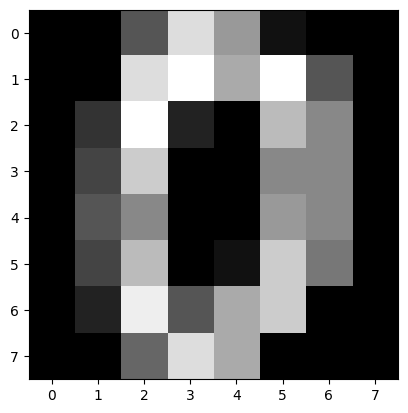

In [11]:
plt.imshow(some_digit, cmap='gray')

In [12]:
y[0]

0

In [17]:
# Split to test-train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
# Create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pipeline = Pipeline(
    [('scalar', StandardScaler()), # Note that these need to instantiate an object, so () is important
     ('pca', PCA(n_components=0.95)),
     ('svm', SVC(random_state=0))]
)

In [27]:
# GridSearch

from sklearn.model_selection import GridSearchCV

params = {
            'svm__C': [1, 5, 8, 10], # test the C hyperparameter of SVM
            'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'] # Try different kernels
          }

grid_search = GridSearchCV(pipeline, params, cv = 4, scoring= 'accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9860820953265242
{'svm__C': 8, 'svm__kernel': 'poly'}


In [ ]:
# Ratio of variance explained

TypeError: _HTMLDocumentationLinkMixin._get_doc_link() missing 1 required positional argument: 'self'

TypeError: _HTMLDocumentationLinkMixin._get_doc_link() missing 1 required positional argument: 'self'

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scalar',
                                        <class 'sklearn.preprocessing._data.StandardScaler'>),
                                       ('pca', PCA(n_components=0.95)),
                                       ('svm', SVC(random_state=0))]),
             param_grid={'svm_C': [1, 5, 8, 10],
                         'svm_kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [21]:
X_train

array([[ 0.,  0.,  0., ..., 16., 16.,  6.],
       [ 0.,  3., 12., ..., 16.,  2.,  0.],
       [ 0.,  1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [22]:
y_train

array([6, 5, 3, ..., 7, 7, 8])